In [1]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
from string import punctuation
r = requests.get("https://www.gutenberg.org/files/1661/1661.txt")
st = BeautifulSoup(r.content)
text_p = (''.join(s.findAll(text=True))for s in st.findAll('p'))
print(text_p)
c_p = Counter((x.rstrip(punctuation).lower() for y in text_p for x in y.split()))
print(c_p)
text_div = (''.join(s.findAll(text=True)) for s in st.findAll('div'))
c_div =Counter((x.rstrip(punctuation).lower() for y in text_div for x in y.split()))
total = c_div + c_p
print(total)

<generator object <genexpr> at 0x000001970E003200>
Counter({'the': 5704, 'and': 2939, 'of': 2767, 'to': 2742, 'a': 2652, 'i': 2603, 'in': 1793, 'that': 1678, 'it': 1566, 'he': 1420, 'was': 1402, 'you': 1391, 'his': 1152, 'is': 1129, 'my': 955, 'have': 914, 'with': 874, 'as': 851, 'had': 826, 'at': 773, 'which': 769, 'for': 740, 'be': 645, 'not': 635, 'me': 634, 'but': 557, 'from': 504, 'we': 502, 'this': 495, 'said': 486, 'upon': 465, 'holmes': 456, 'there': 456, 'him': 433, 'so': 431, 'her': 426, 'she': 412, 'all': 400, 'been': 393, 'your': 379, 'on': 378, 'very': 377, 'one': 357, 'by': 353, 'are': 350, '"i': 349, 'were': 344, 'an': 335, 'no': 325, 'would': 325, 'out': 319, 'what': 316, 'then': 310, 'up': 304, 'when': 304, 'man': 288, 'could': 286, 'has': 285, 'do': 282, 'into': 275, 'or': 269, 'little': 269, 'will': 266, 'who': 265, 'mr': 262, 'if': 255, 'some': 240, 'see': 229, 'down': 229, 'now': 214, 'should': 211, 'our': 210, 'may': 208, 'am': 185, 'us': 183, 'they': 180, 'over':

In [2]:
import matplotlib.pyplot as plt

In [3]:
from collections import Counter
import numpy as np

In [4]:
labels, values = zip(*total.items())

In [5]:
print(labels)

('project', "gutenberg's", 'the', 'adventures', 'of', 'sherlock', 'holmes', 'by', 'arthur', 'conan', 'doyle', 'this', 'ebook', 'is', 'for', 'use', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'away', 'or', 're-use', 'under', 'terms', 'gutenberg', 'license', 'included', 'online', 'www.gutenberg.org', 'title', 'author', 'posting', 'date', 'april', '18', '2011', '[ebook', '#1661', 'first', 'posted', 'november', '29', '2002', 'language', 'english', 'character', 'set', 'encoding', 'ascii', '', 'start', 'produced', 'an', 'anonymous', 'volunteer', 'jose', 'menendez', 'sir', 'i', 'a', 'scandal', 'in', 'bohemia', 'ii', 'red-headed', 'league', 'iii', 'case', 'identity', 'iv', 'boscombe', 'valley', 'mystery', 'v', 'five', 'orange', 'pips', 'vi', 'man', 'twisted', 'lip', 'vii', 'adventure', 'blue', 'carbuncle', 'viii', 'speckled', 'band', 'ix', "engineer's", 'thumb', 'x', 'noble', 'bachelor', 'xi', 'beryl', 'co

In [6]:
print(values)

(84, 1, 5704, 11, 2767, 101, 456, 353, 19, 4, 4, 495, 9, 1129, 740, 44, 29, 4, 773, 325, 6, 2939, 874, 20, 2, 2, 1391, 208, 14, 1566, 62, 106, 269, 2, 48, 24, 31, 17, 4, 4, 2, 3, 1, 1, 11, 3, 1, 1, 1, 1, 86, 9, 1, 1, 1, 2, 10, 20, 50, 1, 3, 20, 16, 5, 335, 2, 3, 2, 2, 77, 2603, 2652, 13, 1793, 12, 3, 20, 17, 3, 110, 4, 2, 15, 7, 22, 2, 35, 11, 12, 2, 288, 10, 12, 2, 25, 24, 7, 2, 5, 13, 2, 2, 16, 2, 14, 8, 2, 4, 28, 2, 13, 12, 2742, 412, 57, 59, 914, 6, 113, 433, 2, 426, 164, 161, 62, 1152, 87, 1, 1, 45, 1, 1402, 635, 1678, 1420, 32, 5, 3, 18, 14, 16, 400, 1, 357, 7, 344, 1, 21, 3, 557, 4, 1, 58, 79, 90, 7, 11, 4, 16, 14, 285, 72, 851, 7, 325, 19, 73, 4, 22, 97, 27, 1, 1, 36, 1, 5, 180, 3, 29, 1, 6, 8, 504, 2, 3, 4, 4, 6, 2, 115, 1, 275, 101, 7, 1, 2, 1, 4, 1, 3, 769, 126, 11, 64, 465, 1, 12, 1, 1, 2, 3, 1, 1, 645, 174, 1, 159, 33, 24, 85, 456, 27, 1, 2, 10, 826, 269, 7, 955, 26, 2, 183, 33, 12, 3, 1, 4, 5, 304, 3, 265, 4, 10, 1, 6, 1, 24, 67, 1, 81, 13, 14, 4, 10, 18, 210, 8, 42, 82, 

In [7]:
indSort = np.argsort(values)[::-1]
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]
indexes = np.arange(len(labels))
bar_width = 0.3
total_1 = total.most_common(20)
print(total_1)
letter_counts = Counter(total_1)


[('the', 5704), ('and', 2939), ('of', 2767), ('to', 2742), ('a', 2652), ('i', 2603), ('in', 1793), ('that', 1678), ('it', 1566), ('he', 1420), ('was', 1402), ('you', 1391), ('his', 1152), ('is', 1129), ('my', 955), ('have', 914), ('with', 874), ('as', 851), ('had', 826), ('at', 773)]


In [8]:
import pandas
letter_counts = Counter(total_1)
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
label,ys = zip(*total_1)
xs = np.arange(len(label))

In [9]:
indSort = np.argsort(values)[::-1]
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]
indexes = np.arange(len(labels))
bar_width = 0.3
total_1 = total.most_common(15)
print(total_1)
letter_counts = Counter(total_1)

[('the', 5704), ('and', 2939), ('of', 2767), ('to', 2742), ('a', 2652), ('i', 2603), ('in', 1793), ('that', 1678), ('it', 1566), ('he', 1420), ('was', 1402), ('you', 1391), ('his', 1152), ('is', 1129), ('my', 955)]


In [10]:
total_1 = total.most_common(15)
print(total_1)
letter_counts = Counter(total_1)

[('the', 5704), ('and', 2939), ('of', 2767), ('to', 2742), ('a', 2652), ('i', 2603), ('in', 1793), ('that', 1678), ('it', 1566), ('he', 1420), ('was', 1402), ('you', 1391), ('his', 1152), ('is', 1129), ('my', 955)]


In [11]:
import pandas
letter_counts = Counter(total_1)
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
label,ys = zip(*total_1)
xs = np.arange(len(label))

Text(13.6, 955, 'my')

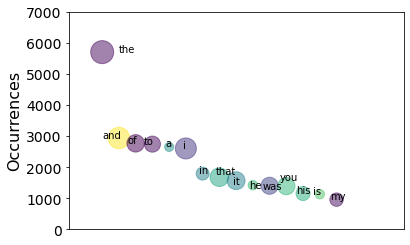

In [16]:
#a = plt.subplots()
fig,ax = plt.subplots()
N = 15
colors = np.random.rand(N)
area = (ys* np.random.rand(N))**0.8
ax.scatter(xs, ys, s=area, c=colors, alpha=0.5)
plt.xlim(-2,18)
plt.ylim(0,7000)
plt.ylabel("Occurrences", fontsize=16)
#plt.xlabel("1", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xticks([])
ax.annotate(labels[0], (xs[0]+1,ys[0]+1))
ax.annotate(labels[1], (xs[1]-1,ys[1]+10))
ax.annotate(labels[2], (xs[2]-0.5,ys[2]+10))
ax.annotate(labels[3], (xs[3]-0.5,ys[3]+10))
ax.annotate(labels[4], (xs[4]-0.2,ys[4]+10))
ax.annotate(labels[5], (xs[5]-0.2,ys[5]+10))
ax.annotate(labels[6], (xs[6]-0.2,ys[6]+10))
ax.annotate(labels[7], (xs[7]-0.2,ys[7]+100))
ax.annotate(labels[8], (xs[8]-0.2,ys[8]-100))
ax.annotate(labels[9], (xs[9]-0.2,ys[9]-100))
ax.annotate(labels[10], (xs[10]-0.4,ys[10]-100))
ax.annotate(labels[11], (xs[11]-0.4,ys[11]+180))
ax.annotate(labels[12], (xs[12]-0.4,ys[12]))
ax.annotate(labels[13], (xs[13]-0.4,ys[13]))
ax.annotate(labels[14], (xs[14]-0.4,ys[14]))


In [17]:
# reference https://stackoverflow.com/questions/46271528/counting-words-inside-a-webpage